In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
train_df = pd.read_csv('house_price_train.csv')
test_df = pd.read_csv('house_price_test.csv')

y_train = train_df.price
y_test = test_df.price

# Correlation analysis

In [3]:
train_df.corr()['price'].sort_values()

zipcode         -0.044555
id              -0.014968
long             0.011760
yr_built         0.040336
condition        0.047331
sqft_lot15       0.077641
sqft_lot         0.085830
yr_renovated     0.135626
waterfront       0.268705
floors           0.278863
bedrooms         0.302262
lat              0.309542
sqft_basement    0.321816
view             0.400164
bathrooms        0.523939
sqft_living15    0.595720
sqft_above       0.604982
grade            0.665403
sqft_living      0.701237
price            1.000000
Name: price, dtype: float64

We can find the `sqft_living` `grade` and `sqft_above` have strong correlations with price.

In [4]:
train_df.drop(['id', 'price'], axis=1, inplace=True)
test_df.drop(['id', 'price'], axis=1, inplace=True)

In [5]:
train_df.shape

(20000, 19)

In [6]:
train_df.dtypes

date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Feature transformation

date is string type so we convert it to numerica by 
1. Keeping 6 characters (Year Month)
2. Use LabelEncoder to convert categorical to numerical


In [7]:
def convert_to_date(date_string: str):
    """
    Only keep year and month 
    """
    # date = date_string[:8]
    # return pd.to_datetime(date, format='%Y%m%d', errors='ignore')
    return date_string[:6]

In [8]:
train_df.date = train_df.date.apply(convert_to_date)
test_df.date = test_df.date.apply(convert_to_date)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_df.date = label_encoder.fit_transform(train_df.date)
test_df.date = label_encoder.fit_transform(test_df.date)


# Normlize columns

Because value range of some columns are very big. This could dominate the train process.

We normalize them by MinMaxScaler

In [10]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = train_df.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

In [11]:
x_scaled.shape

(20000, 19)

In [12]:
# Run the normalizer on the dataframe
train_df_norm = pd.DataFrame(x_scaled, columns=train_df.columns)

In [13]:
train_df_norm.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.416667,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.583333,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.750000,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.583333,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.750000,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


# Distribution of price

Let's see the distribution of house price

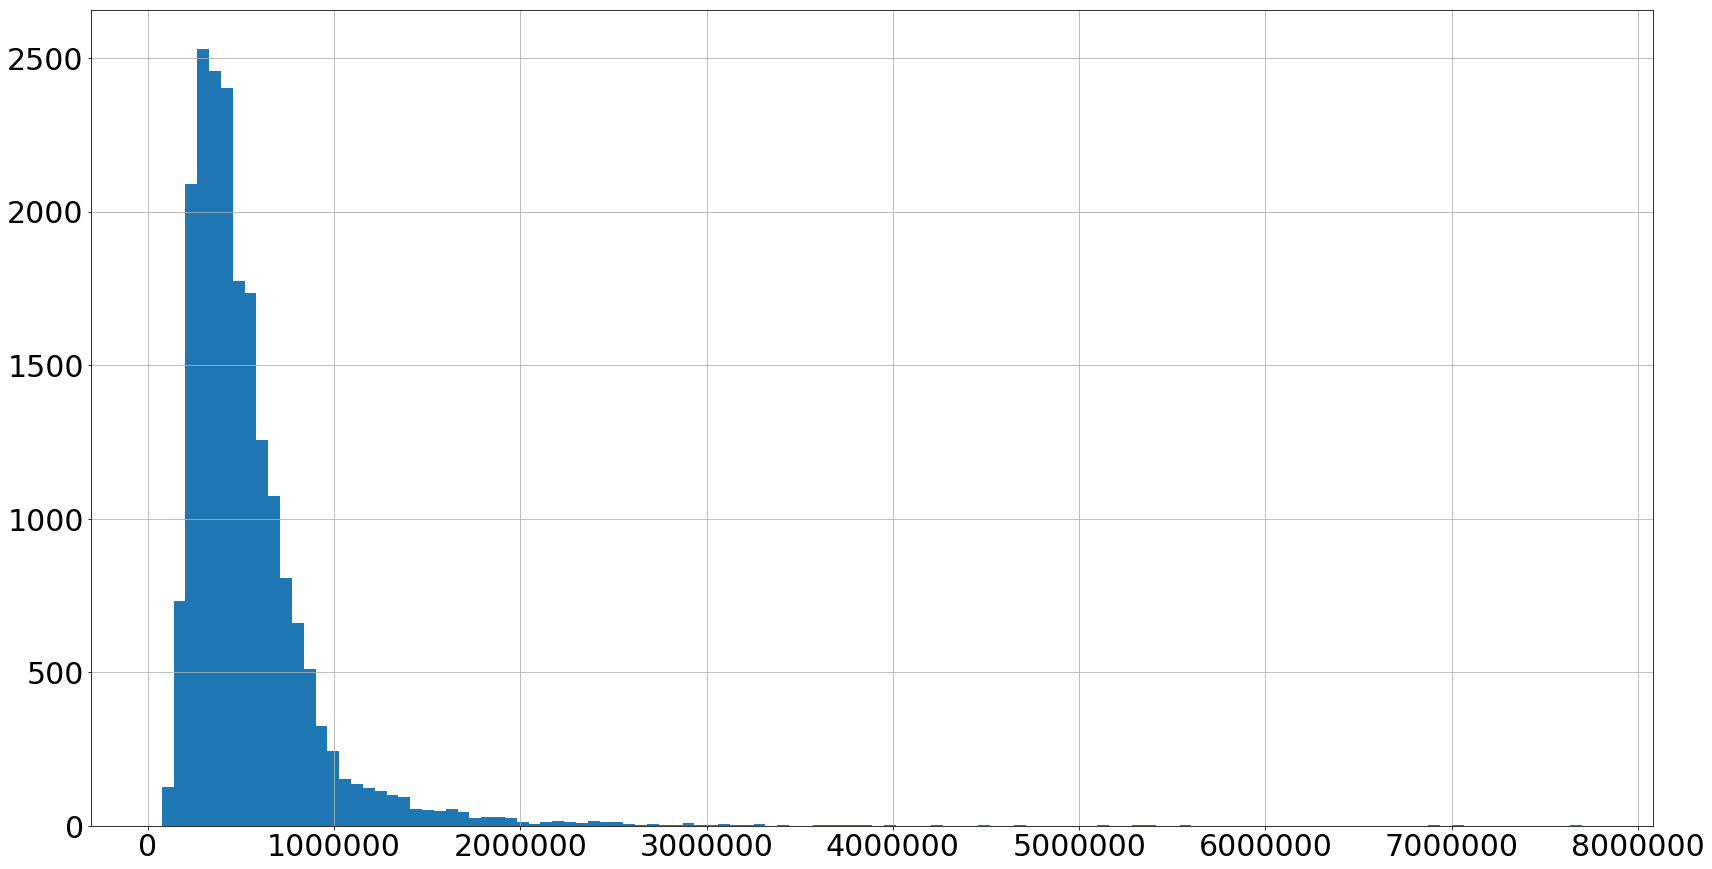

In [14]:
y_train.hist(xlabelsize=30, ylabelsize=30, bins=120,figsize=(28,15))

In [15]:
y_train.describe()

count    2.000000e+04
mean     5.354737e+05
std      3.659484e+05
min      7.500000e+04
25%      3.170000e+05
50%      4.499500e+05
75%      6.400000e+05
max      7.700000e+06
Name: price, dtype: float64

In [16]:
(y_train>640000).sum()

4962

75% of the house prices are in the range between 0 and 640000

From the table, we can see the descriptive statistics of training data 

# Skewness

[skewness](https://whatis.techtarget.com/definition/skewness)

The skewness should be about zero for normal distribution. 

A skenewss  value greater than zero means that there is more weight in the left tail of the distribution

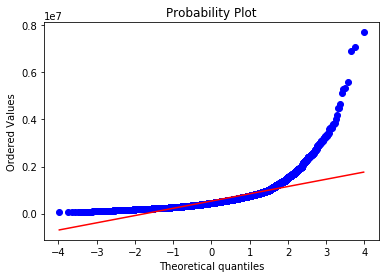

Skewness: 4.118


In [17]:
plt.figure()
qq = stats.probplot(y_train, plot=plt)
plt.show()

print("Skewness: {:.3f}".format(y_train.skew()))

Our data has a positive skewness. There is more weight in the left tail of the price distribution

Next, we take a log of price column and see what happens!

Skewness: 0.419


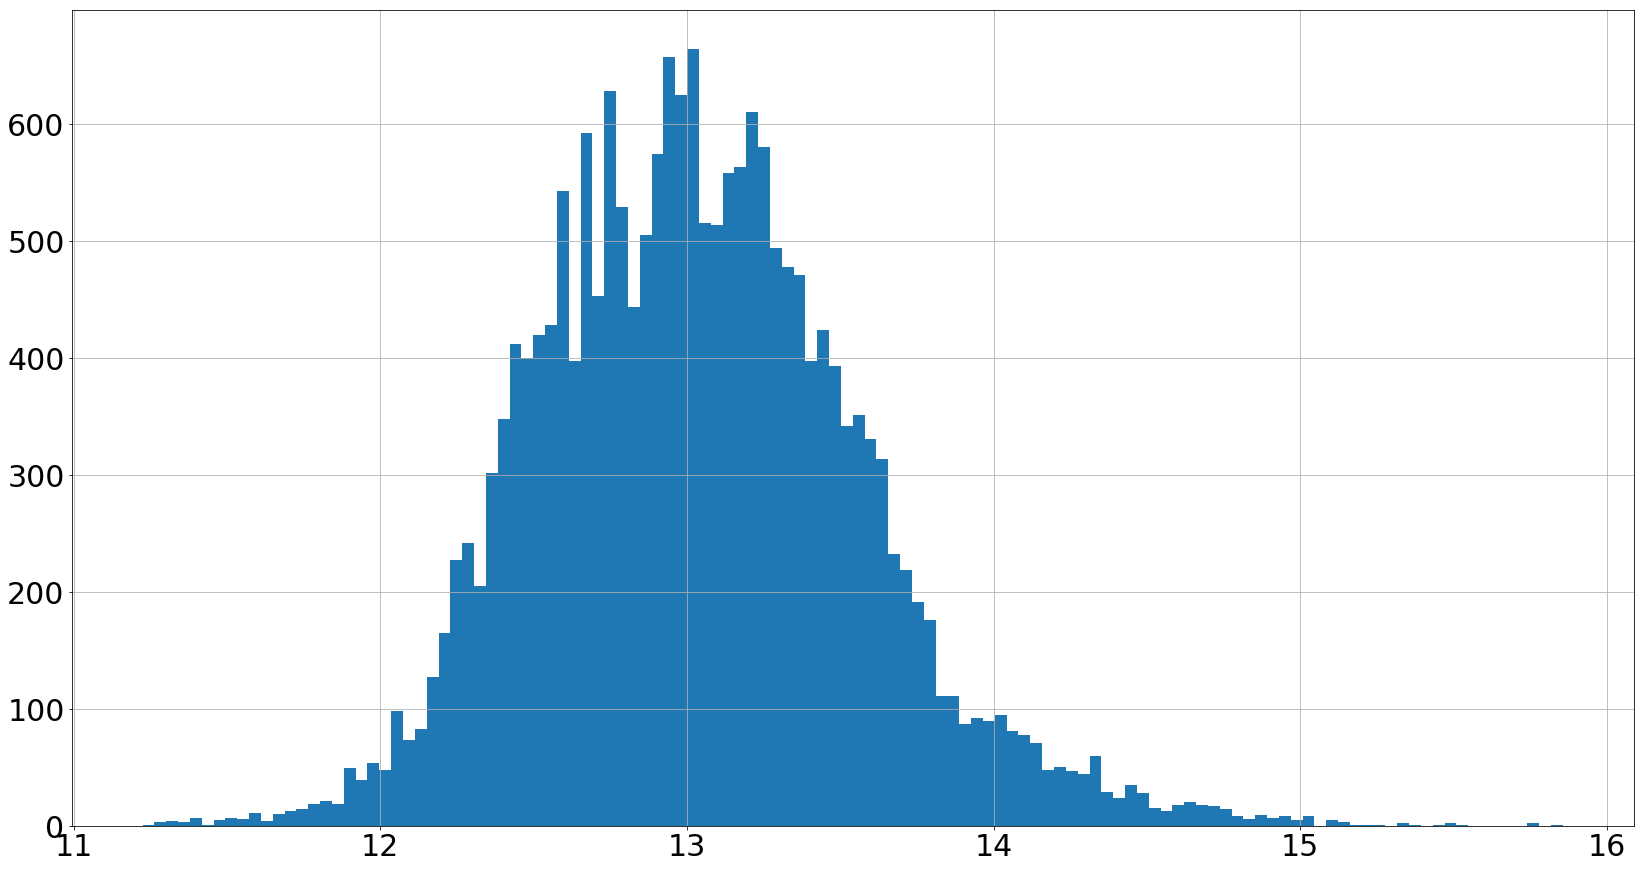

In [18]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

y_train.hist(xlabelsize=30, ylabelsize=30, bins=120,figsize=(28,15))


print("Skewness: {:.3f}".format(y_train.skew()))

The distribution is more like a normal distribution than before!


# Q-Q Plot

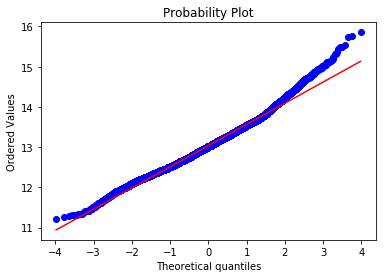

In [19]:
plt.figure()
qq = stats.probplot(y_train, plot=plt)
plt.show()

By taking a log of price column, it is close to normal distribution

In [20]:
train_df.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# GBM

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [22]:
X_train, y_train = train_df.values, y_train.values
X_test, y_test = test_df.values, y_test.values

MSE: 0.0242


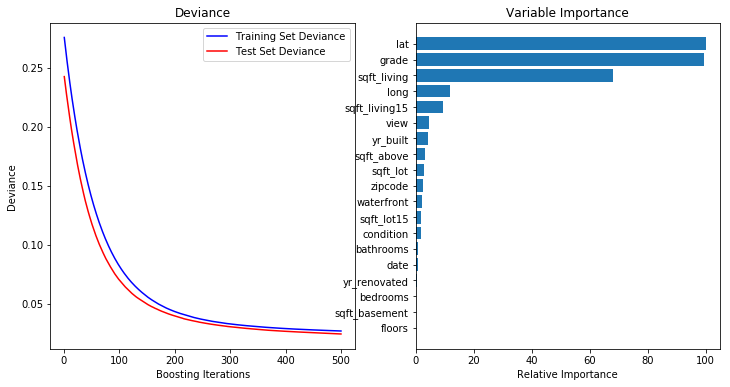

In [23]:


params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

gb_reg = ensemble.GradientBoostingRegressor(**params)

gb_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, gb_reg.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = gb_reg.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = gb_reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Random Forest

MSE: 0.0308


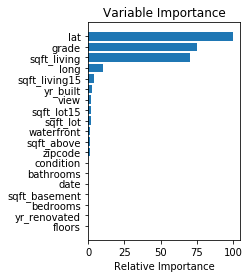

In [24]:
from sklearn.ensemble import RandomForestRegressor




params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2}

rf_reg = RandomForestRegressor(**params)

rf_reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, rf_reg.predict(X_test))
print("MSE: %.4f" % mse)


# #############################################################################
# Plot feature importance
feature_importance = rf_reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


# XGBoost

In [25]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_x,train_y)



Ref:


[Using Random Forests in Python with Scikit-Learn](https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/)